# Project 4 - Polynomial Regression from Scratch

In this notebook, you will write code that will:
-  generate a dataset, 
-  model it using a polynomial regression, 
-  and find the optimal model parameters for it (writing your own optimization routine).

All of the parts of this are meant to be done "from scratch", so do not use sklearn. (numpy's ok)  
Note: this is a continuation of the exercise we started in class previously.  

In [1]:
#Write a report!
import numpy as np    
import sys as sys
import matplotlib.pyplot as plt

## Dataset
Create a dataset with 1,000 1-D X and corresponding y values, each w/ a small amount of added uniform random noise (max val = 0.1).  (So unlike example in class which had a surface and 2 features, this is like the book example with a curve with 1 feature.)

-  make X go from -5 to 5 (plus noise)
-  make $y = 5 + 7x + 2x^2 - 0.5x^3$   (plus noise)

In [3]:
#Note: I'm making this pretty verbose because it helps a lot with debugging.
#Create our blank X dataset
x_values = np.linspace(-5.0,5.0,1000)

#be verbose
print("first 10 values of x_values:")
print("")
print(x_values[0:10])
print("")

#This function adds a number between -0.1 and 0.1 to the value at i in x_values. I had to pull in the smallest possible
#number that the host machine can support in python, because random.uniform doesn't include the end number
#and the MAX number is 0.1. That was the only way to get it in there that I could think of.
def add_noise(numInput, verbose = False):
    
    lowest_add = -(0.1)
    highest_add = (0.1 + sys.float_info.min)
    
    add_num = np.random.uniform(lowest_add, highest_add)
    
    if(verbose):
        print("added " + str(add_num) + " as noise")
        
    output = numInput + add_num
    return output

#add noise to our data, and only be verbose for part of the set.
for i in range(0, len(x_values)):
    
    if(i < 5):
        x_values[i] = add_noise(x_values[i], verbose=True)#be verbose
    else:
        x_values[i] = add_noise(x_values[i])

#be verbose
print("")
print("first 10 noisy x_values:")
print("")
print(x_values[0:10])
print("")
       
#This calculates an exact y value given an x. We'll add noise in a bit.
def calculate_y(x):
    y = ((5) + (7*x) + (2*(x**2)) + (-0.5*(x**3)))#maybe a little overkill on the parentheses
    return y
    
#Create a blank array that's the same length as x_values, and fill with zeroes for now.
y_values = np.zeros(len(x_values))

#calculate the value of y that goes in each slot of the array.
for i in range(0, len(x_values)):
    y_values[i] += calculate_y(x_values[i])
    
#be verbose
print("first 10 values of y_values:")
print("")
print(y_values[0:10])
print("")

#Add noise to our y_values. This won't affect much, as y values tend to be a LOT bigger than x values.
for i in range(0, len(y_values)):
    
    if(i < 5):
        y_values[i] = add_noise(y_values[i], verbose=True)#be verbose
    else:
        y_values[i] = add_noise(y_values[i])
        
#be verbose
print("")
print("first 10 noisy y_values;")
print("")
print(y_values[0:10])
print("")
        
#make our container for everything! Also append our arrays to it.       
matrix = []
matrix.append(x_values)
matrix.append(y_values)

#Be verbose
print("")
print("matrix shape is: " + str(np.shape(matrix)) + " and the [0][0] value is: " + str(matrix[0][0]))
print("")

print("now transposing matrix")
print("")

#put it in column-standard configuration, and print out an index that should stay the same to make sure it worked
matrix = np.transpose(matrix)

print("matrix shape is: " + str(np.shape(matrix)) + " and the [0][0] value is: " + str(matrix[0][0]))
print("")

first 10 values of x_values:

[-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991]

added -0.06944780650481813 as noise
added -0.07674485108373977 as noise
added 0.021161446005190807 as noise
added 0.042038351716570055 as noise
added -0.01262380581434766 as noise

first 10 noisy x_values:

[-5.06944781 -5.06673484 -4.95881853 -4.92793162 -4.97258377 -5.00456854
 -5.02449276 -4.91814656 -4.83633252 -4.81855655]

first 10 values of y_values:

[86.05310018 85.9125667  80.43641222 78.90970116 81.12261054 82.73090962
 83.74259063 78.42977701 74.48707708 73.64687531]

added 0.05219910635861494 as noise
added 0.03165284558389317 as noise
added 0.01829140645338967 as noise
added -0.07189576005525325 as noise
added 0.08252648542943708 as noise

first 10 noisy y_values;

[86.10529929 85.94421954 80.45470363 78.8378054  81.20513703 82.69194294
 83.68983247 78.52311945 74.53914277 73.73547189]


matrix shape is: (2, 1000) and th

## Augment X
Write a function that adds new columns to the dataset of powers of X, up to and including $X^5$ (and don't forget the ones for the $\theta_0$ term).

In [4]:
#my interpretation is that I am adding columns of x in which x is raised to the n'th power. These columns will
#be placeholders that will get multiplied by our fifth-degree polynomial's weights later for testing. I don't see this 
#actually happening in real use-cases, because it seems a bit expensive for large data sets? I could be wrong though.

#Be verbose
print("matrix shape:")
print(str(np.shape(matrix)))
print("")

#Grab our x_values array for easy refrence and use here.
x_values = matrix[:,0]
                  
#raises all values in an array to the specified power, and returns the new array
def raise_array_values_to_power(array, power):
    return_array = np.zeros(len(array))#make a new array to put everything in to stay safe
    for i in range(0, len(array)):
        return_array[i] += array[i]**power
    return return_array

#raises all x values to n. Be careful not to corrupt refrence array! I'm using all this as a test of the power raising
#function. the real function that can add n power columns will come below.
x_to_zero = raise_array_values_to_power(x_values, 0)
x_to_one = raise_array_values_to_power(x_values, 1)
x_to_two = raise_array_values_to_power(x_values, 2)
x_to_three = raise_array_values_to_power(x_values, 3)
x_to_four = raise_array_values_to_power(x_values, 4)
x_to_five = raise_array_values_to_power(x_values, 5)

#be verbose
print("first 5 values of y_values:")#our labels
print("")
print(y_values[0:5])
print("")
print("first 5 values of x_values:")
print(x_values[0:5])
print("")
print("first 5 values of x_to_zero")
print(x_to_zero[0:5])#should all be 1
print("")
print("first 5 values of x_to_one")
print(x_to_one[0:5])

#Now, if I wasn't using a function after this, I'd add these as COLUMNS on the "right" side of the matrix
#Desired Matrix Column Layout: x_values, y_values, x_to_zero, x_to_one, x_to_two, x_to_three, x_to_four, x_to_five

def add_column_powers(reference_array_to_raise, matrix_to_add_to, highest_power):
    
    for i in range(0, highest_power+1):#for each power, make a new array and slap it on the end.
        array = reference_array_to_raise
        array = raise_array_values_to_power(array, i)#make the array
        array = array[:, np.newaxis]#make it a column vector!
        matrix_to_add_to = np.concatenate([matrix_to_add_to, array], axis=1)#Stick it on the end of the matrix
   
    return matrix_to_add_to
    
newMatrix = add_column_powers(x_values, matrix, 5)

#be verbose
print("")
print("newMatrix shape")
print(np.shape(newMatrix))
print("")
print("first row of matrix:")
print("")
print(newMatrix[0])

matrix shape:
(1000, 2)

first 5 values of y_values:

[86.10529929 85.94421954 80.45470363 78.8378054  81.20513703]

first 5 values of x_values:
[-5.06944781 -5.06673484 -4.95881853 -4.92793162 -4.97258377]

first 5 values of x_to_zero
[1. 1. 1. 1. 1.]

first 5 values of x_to_one
[-5.06944781 -5.06673484 -4.95881853 -4.92793162 -4.97258377]

newMatrix shape
(1000, 8)

first row of matrix:

[-5.06944781e+00  8.61052993e+01  1.00000000e+00 -5.06944781e+00
  2.56993011e+01 -1.30281265e+02  6.60454075e+02 -3.34813746e+03]


## Fit a Polynomial Regression model to the training data
Assume that we have a polynomial regression model
\begin{equation*}
y(X;\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4 +\theta_5 x^5 
\end{equation*}

Assume that we're using a mean squared error function.

-  Find the optimal value of theta (ie $\theta_0$ through $\theta_5$). Note: Refer to Ch. 4, Eqn's 4.6 and 4.7.

-  Try this for a variety of different values of alpha.  Note how long it takes for the optimization to converge (or if it doesn't).


In [17]:
def calculate_best_theta(matrix):
    
    x_values = matrix[:,0]
    y_values = matrix[:,1]
    powers = matrix[:,2:len(matrix)-2]#get all powers in single matrix without x or y values
    
    learningRate = 0.1
    n_iterations = 1000
    num_instances = 10#len(x_values)
    
    theta = np.zeros(len(powers[0]))
    
    for iteration in range(0, n_iterations):
        
        currentGradient = 2/num_instances*powers.T.dot(powers.dot(theta) - y_values)#definition of gradient vector
        theta = theta - learningRate*currentGradient
        
        print("theta") 
        print(theta)

    return theta

best_theta = calculate_best_theta(newMatrix)
print(answer)

theta
[ 4.35379345e+02 -9.37388493e+01  5.90057596e+03 -5.09909429e+03
  1.03645458e+05 -1.29021311e+05]
theta
[-2.69917558e+08  5.86116826e+09 -4.92745304e+09  1.14550728e+11
 -9.82015147e+10  2.35534528e+12]
theta
[ 3.83390419e+14 -1.06950603e+17  8.46243670e+15 -2.08911058e+18
  2.01046735e+17 -4.29303151e+19]
theta
[-2.96490887e+21  1.94927526e+24 -8.20905348e+22  3.80750739e+25
 -2.25510643e+24  7.82404801e+26]
theta
[ 5.04678596e+28 -3.55254550e+31  1.43211598e+30 -6.93915705e+32
  3.98495350e+31 -1.42592568e+34]
theta
[-9.16608181e+35  6.47448136e+38 -2.60434390e+37  1.26465489e+40
 -7.25145788e+38  2.59873606e+41]
theta
[ 1.67022913e+43 -1.17996810e+46  4.74588885e+44 -2.30482156e+47
  1.32147304e+46 -4.73617183e+48]
theta
[-3.04395187e+50  2.15048067e+53 -8.64929282e+51  4.20051544e+54
 -2.40836337e+53  8.63162826e+55]
theta
[ 5.54757122e+57 -3.91923064e+60  1.57632502e+59 -7.65539956e+61
  4.38921863e+60 -1.57310607e+63]
theta
[-1.01103958e+65  7.14276068e+67 -2.87283737e+66 

[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan nan nan nan nan]
theta
[nan nan

## Plot the Final Model
Make a plot showing the (X,y) data points of the training set, and superimpose the line for the model on the same plot.

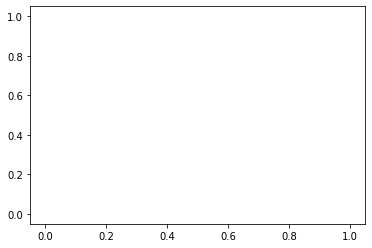

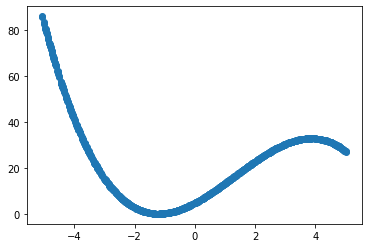

In [10]:
#bring in some variable arrays and matrices
x_values = matrix[:,0]
powers = newMatrix[:,2:len(newMatrix[0])]#get all power columns afer x and y values
y_guesses = np.zeros(len(powers))

#for each x row, dot it with the guess theta. (That's the same as running the polynomial.) 
for i in range(0, len(powers)):
    y_guesses[i] += powers[i].dot(best_theta)
    

guess_graph = plt.scatter(x_values, y_guesses)
plt.show(guess_graph)

real_graph = plt.scatter(x_values, y_values)
plt.show(real_graph)

## Different Model Degrees
Try the model for different degrees of n, specifically n = (2, 5, 10).  Plot the resulting models.